In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
pd.set_option('future.no_silent_downcasting', True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
data = pd.read_csv('BO_Training_Dataset.csv')

print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print("Number of categorical featues including Product id and target variable : " , data.select_dtypes(exclude=['int', 'float']).shape[1])
print('Features : ', data.columns.values)

Number of data points :  1048575
Number of features :  23
Number of categorical featues including Product id and target variable :  7
Features :  ['sku' 'national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [ ]:
data= data[:50000]

In [ ]:
data['went_on_backorder'].value_counts()

,count
went_on_backorder,
No,49498
Yes,502


In [ ]:
data['went_on_backorder'].value_counts()/ len(data) * 100

,count
went_on_backorder,
No,98.996
Yes,1.004


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name = 'Features'
missing_data

,Total Missing Count,% of Total Observations
Features,,
lead_time,3013,0.06026
sku,0,0.00000
potential_issue,0,0.00000
rev_stop,0,0.00000
stop_auto_buy,0,0.00000
ppap_risk,0,0.00000
oe_constraint,0,0.00000
deck_risk,0,0.00000
local_bo_qty,0,0.00000


In [ ]:
df = data.drop(columns=['sku'])
num_features = df.select_dtypes(include=['int64', 'float64'])

skewness = num_features.skew()
print(skewness)

national_inv         219.791728
lead_time              4.599785
in_transit_qty       127.284487
forecast_3_month     139.139632
forecast_6_month     143.040866
forecast_9_month     139.756086
sales_1_month        120.366694
sales_3_month        109.846240
sales_6_month        114.630824
sales_9_month        105.200642
min_bank             123.089131
pieces_past_due      136.182197
perf_6_month_avg      -3.139691
perf_12_month_avg     -3.265073
local_bo_qty         123.937608
dtype: float64


## **Descritive statistics**

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
num_features.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,50000.00,46987.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,629.61,7.84,42.00,179.83,351.29,514.16,64.13,190.35,365.30,591.91,60.06,1.98,-7.02,-6.57,0.62
std,55487.07,6.94,1229.08,5845.05,11543.21,16763.74,2377.08,6169.82,11161.97,18779.73,1891.89,147.24,26.81,26.06,30.66
min,-1302.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.66,0.00
50%,15.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.00,0.00,0.00,0.82,0.81,0.00
75%,82.00,9.00,0.00,4.00,12.00,20.00,4.00,15.00,31.00,47.00,4.00,0.00,0.97,0.95,0.00
max,12334404.00,52.00,217729.00,1046592.00,2104128.00,3002688.00,361803.00,884575.00,1763533.00,2758103.00,309667.00,23616.00,1.00,1.00,5208.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   national_inv       50000 non-null  int64  
 1   lead_time          46987 non-null  float64
 2   in_transit_qty     50000 non-null  int64  
 3   forecast_3_month   50000 non-null  int64  
 4   forecast_6_month   50000 non-null  int64  
 5   forecast_9_month   50000 non-null  int64  
 6   sales_1_month      50000 non-null  int64  
 7   sales_3_month      50000 non-null  int64  
 8   sales_6_month      50000 non-null  int64  
 9   sales_9_month      50000 non-null  int64  
 10  min_bank           50000 non-null  int64  
 11  potential_issue    50000 non-null  object 
 12  pieces_past_due    50000 non-null  int64  
 13  perf_6_month_avg   50000 non-null  float64
 14  perf_12_month_avg  50000 non-null  float64
 15  local_bo_qty       50000 non-null  int64  
 16  deck_risk          500

## **Data processing pipleline**

Skewness:
 national_inv        219.79
lead_time             4.31
in_transit_qty      127.28
forecast_3_month    139.14
forecast_6_month    143.04
forecast_9_month    139.76
sales_1_month       120.37
sales_3_month       109.85
sales_6_month       114.63
sales_9_month       105.20
min_bank            123.09
pieces_past_due     136.18
perf_6_month_avg     -3.14
perf_12_month_avg    -3.27
local_bo_qty        123.94
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   national_inv       50000 non-null  float64
 1   lead_time          50000 non-null  float64
 2   in_transit_qty     50000 non-null  float64
 3   forecast_3_month   50000 non-null  float64
 4   forecast_6_month   50000 non-null  float64
 5   forecast_9_month   50000 non-null  float64
 6   sales_1_month      50000 non-null  float64
 7   sales_3_month      5000

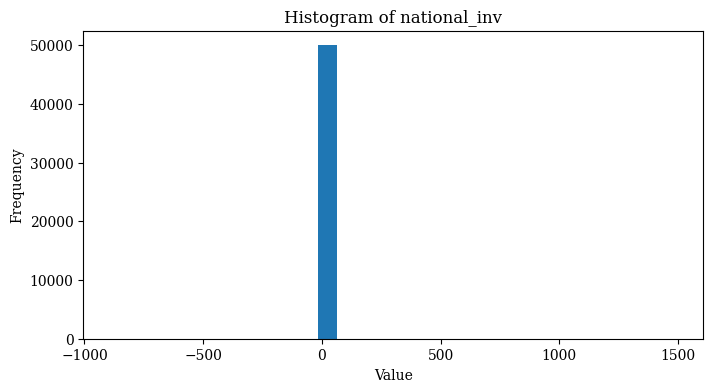

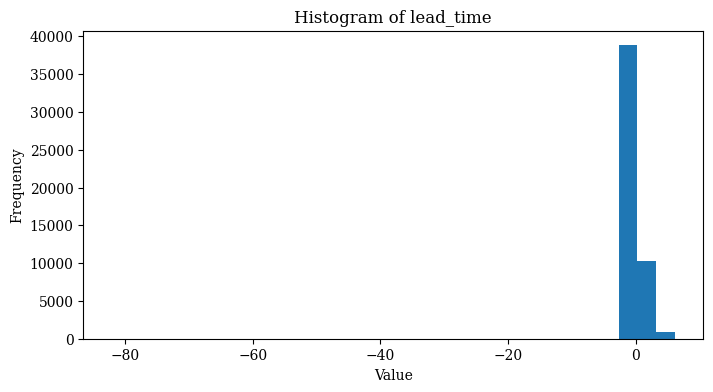

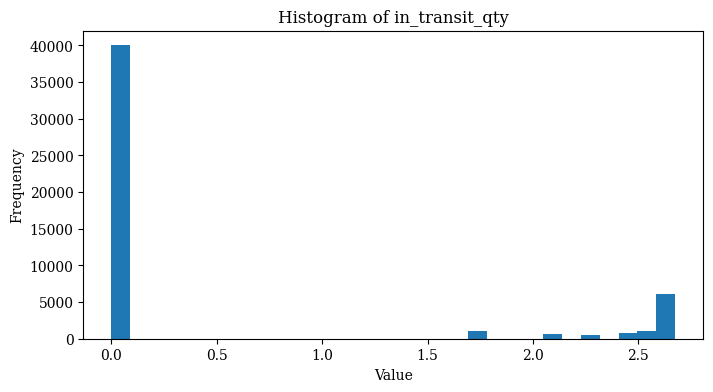

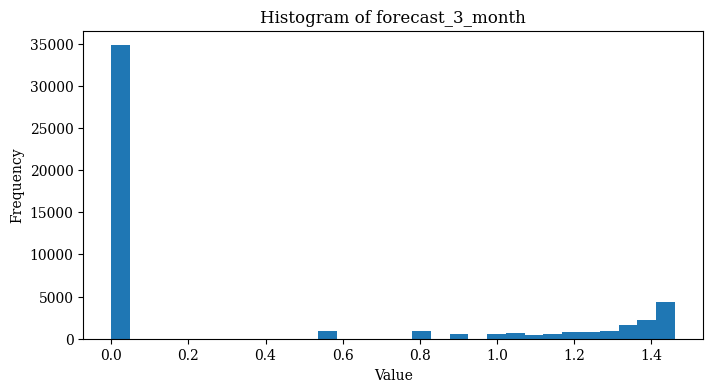

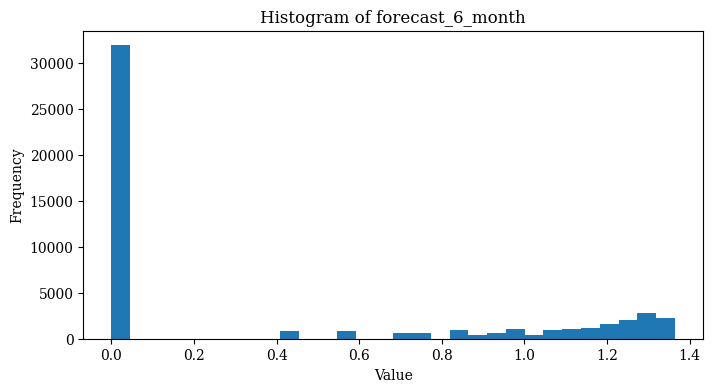

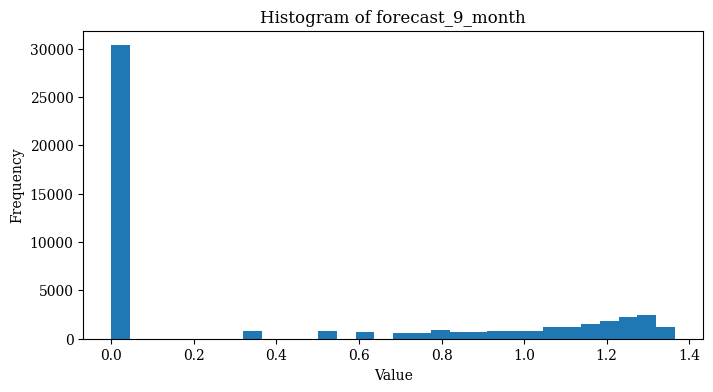

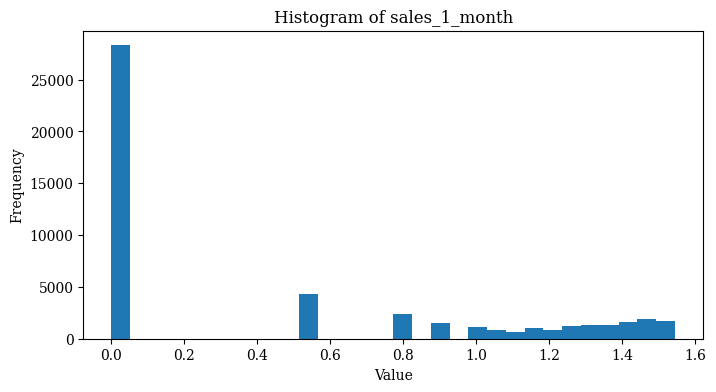

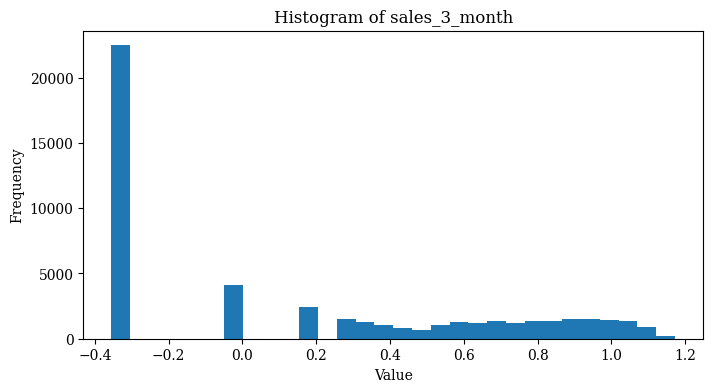

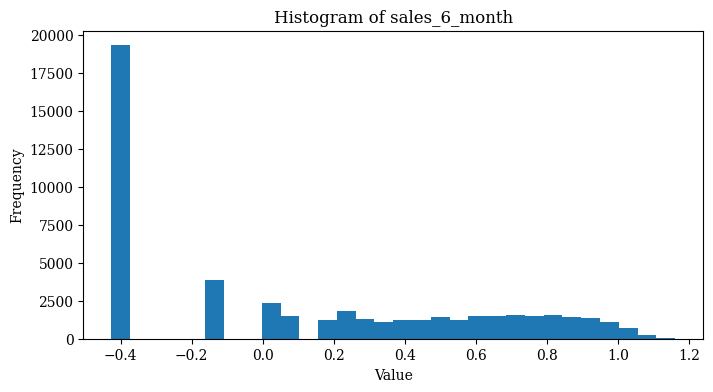

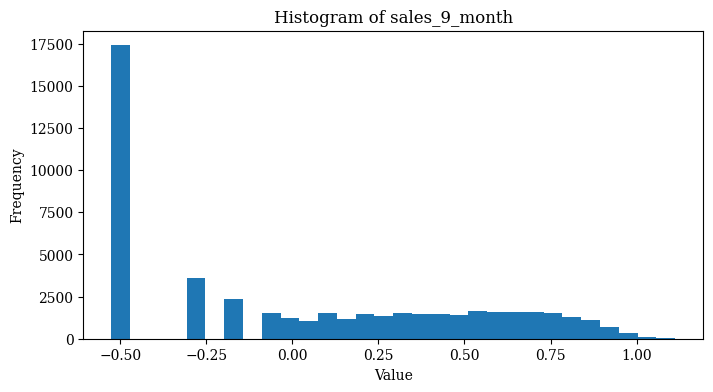

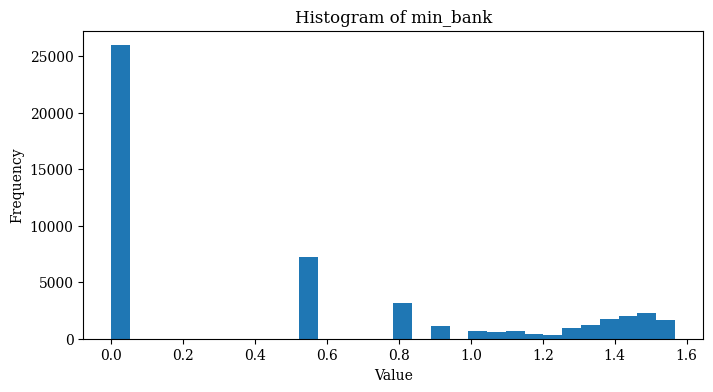

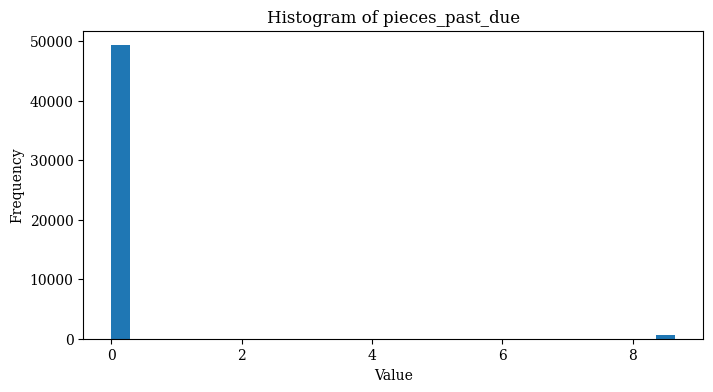

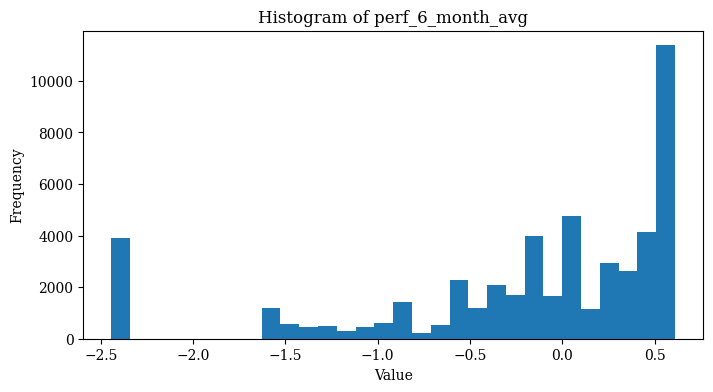

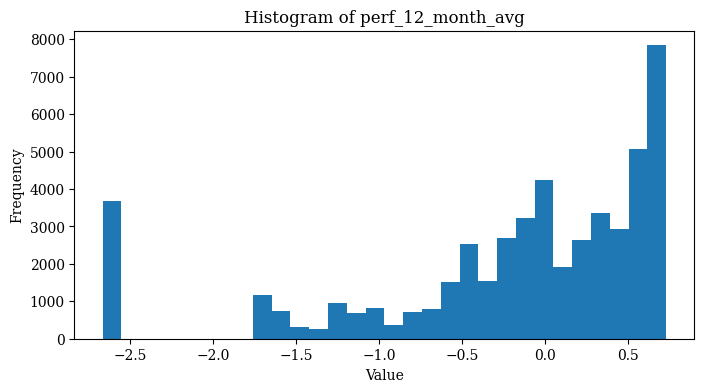

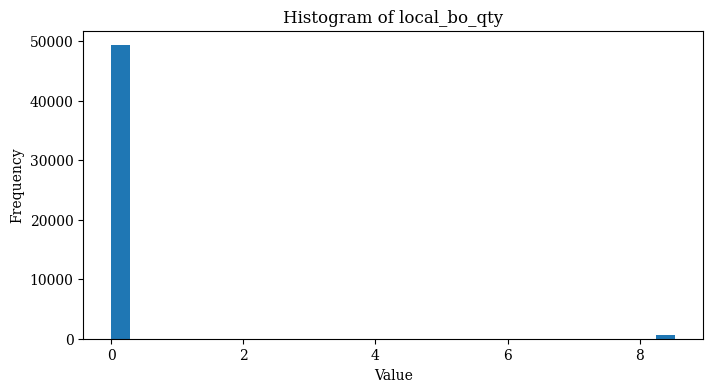

In [ ]:
data = data.drop(columns=['sku'])

num_features = data.select_dtypes(include=['float64', 'int64'])
data.loc[:, 'perf_12_month_avg'] = data['perf_12_month_avg'].replace(-99.0, np.nan)
data.loc[:, 'perf_6_month_avg'] = data['perf_6_month_avg'].replace(-99.0, np.nan)

imputer = IterativeImputer(random_state=2024)
df_imputed = pd.DataFrame(imputer.fit_transform(num_features), columns=num_features.columns)

skewness = df_imputed.skew()
print("Skewness:\n", skewness)

df_transformed = PowerTransformer(method='yeo-johnson').fit_transform(df_imputed)
df_transformed = pd.DataFrame(df_transformed, columns=df_imputed.columns)

scaler = RobustScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].replace({'No': 0.0, 'Yes': 1.0})
    data[col] = data[col].fillna(-1).astype(int)

df_final = pd.concat([df_scaled_num, data[cat_cols]], axis=1)
df_final.info()

skewness_after_scaling = df_scaled_num.skew()
print("Skewness after scaling:\n", skewness_after_scaling)

## **Variation inflation factor**

In [ ]:
dataX = df_final.copy().drop(['went_on_backorder'],axis=1)
dataY = df_final['went_on_backorder'].copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

def calculate_vif(df, threshold=5):
    """Calculate VIF and iteratively remove features with high VIF values."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    while vif_data["VIF"].max() > threshold:
        max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Removing {max_vif_feature} with VIF {vif_data['VIF'].max():.2f}")

        # Drop the feature with the highest VIF
        df = df.drop(columns=[max_vif_feature])

        # Recalculate VIF
        vif_data = pd.DataFrame()
        vif_data["Feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    print("Final features after VIF elimination:")
    print(vif_data)
    return df

dataX_reduced = calculate_vif(dataX.copy())
X_train, X_test, y_train, y_test = train_test_split(
    dataX_reduced, dataY, test_size=0.33, random_state=2024, stratify=dataY)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

Removing sales_6_month with VIF 55.18
Removing forecast_6_month with VIF 27.92
Removing sales_3_month with VIF 20.50
Removing perf_12_month_avg with VIF 12.27
Removing sales_1_month with VIF 8.85
Removing forecast_9_month with VIF 7.97
Final features after VIF elimination:
             Feature  VIF
0       national_inv 1.03
1          lead_time 1.07
2     in_transit_qty 2.28
3   forecast_3_month 2.34
4      sales_9_month 2.39
5           min_bank 3.75
6    pieces_past_due 1.06
7   perf_6_month_avg 1.17
8       local_bo_qty 1.07
9    potential_issue 1.00
10         deck_risk 1.46
11     oe_constraint 1.00
12         ppap_risk 1.14
13     stop_auto_buy 2.82
14          rev_stop 1.00
X_train shape: (33500, 15), X_test shape: (16500, 15)
y_train shape: (33500,), y_test shape: (16500,)


In [ ]:
dataY.value_counts()

,count
went_on_backorder,
0,49498
1,502


In [ ]:
import numpy as np

inf_values = dataX.replace([np.inf, -np.inf], np.nan).isnull().sum()
total_inf_values = inf_values.sum()
print(f"Number of infinite values in dataX: {total_inf_values}")

Number of infinite values in dataX: 0


## **Spearman's correlation**

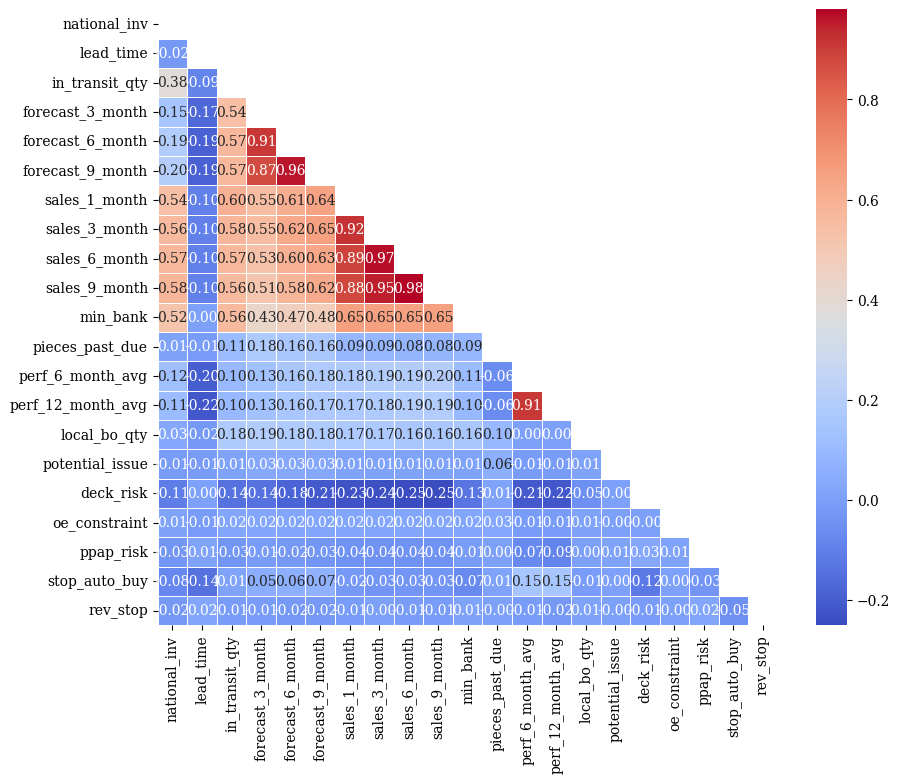

In [ ]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

constant_cols = [col for col in dataX.columns if dataX[col].nunique() == 1]
dataX = dataX.drop(columns=constant_cols)

correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)

for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i, j] = np.round(spearmanr(dataX.loc[:, i], dataX.loc[:, j])[0], 2)

correlationMatrix = correlationMatrix.astype(float)

mask = np.triu(np.ones_like(correlationMatrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', mask=mask)
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
dataX.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,...,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,0.86,-0.06,0.50,0.38,0.39,0.41,0.47,0.15,0.10,0.02,...,0.12,-0.19,-0.20,0.12,0.00,0.24,0.00,0.12,0.97,0.00
std,11.29,1.16,1.00,0.58,0.54,0.53,0.58,0.52,0.51,0.50,...,1.00,0.86,0.92,1.00,0.02,0.43,0.01,0.33,0.18,0.02
min,-886.87,-82.15,0.00,0.00,0.00,0.00,0.00,-0.36,-0.43,-0.53,...,0.00,-2.44,-2.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.23,-0.81,0.00,0.00,0.00,0.00,0.00,-0.36,-0.43,-0.53,...,0.00,-0.50,-0.48,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.77,0.19,0.00,1.00,1.00,1.00,1.00,0.64,0.57,0.47,...,0.00,0.50,0.52,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1487.49,6.18,2.67,1.46,1.36,1.37,1.54,1.17,1.16,1.11,...,8.65,0.61,0.73,8.54,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2024)

## **Spot Check**
### **original class labels**

In [ ]:
pip install dask[dataframe]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(f"Class Weights: {class_weights}")

Class Weights: {0: 0.5050657339283561, 1: 49.851190476190474}


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
precision_at_75_recall = []
recall_target = 0.75

models = []

models.append(('BB_RF', BalancedBaggingClassifier(estimator=RandomForestClassifier(class_weight=class_weights),
                                                  random_state=2024)))
models.append(('XGB', XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                                    random_state=2024)))
models.append(('LGB', LGBMClassifier(class_weight=class_weights, random_state=2024)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=2024)))
models.append(('SVC', SVC(probability=True, class_weight=class_weights, random_state=2024)))

roc_auc_curves = []
pr_auc_curves = []
conf_matrices = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    y_pred = model.predict(X_test)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_curves.append((fpr, tpr, roc_auc, name))

    # PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    pr_auc_curves.append((precision, recall, pr_auc, name))

    # confusion matrix
    conf_matrices.append((name, confusion_matrix(y_test, y_pred)))

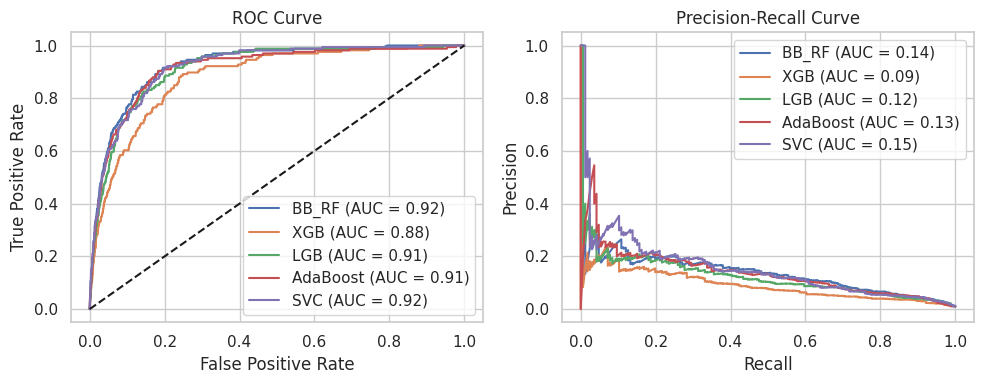

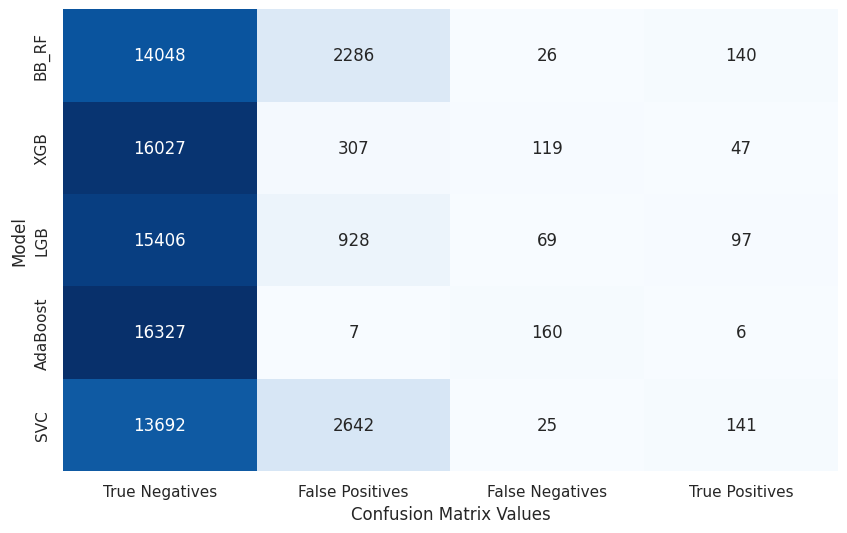

In [ ]:
# Plot ROC AUC and PR AUC side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot ROC AUC curves
for fpr, tpr, roc_auc, name in roc_auc_curves:
    axes[0].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')
plt.grid()

# Plot PR AUC curves
for precision, recall, pr_auc, name in pr_auc_curves:
    axes[1].plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

# Create confusion matrix table
conf_matrix_data = []
for name, conf_matrix in conf_matrices:
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_matrix_data.append([name, tn, fp, fn, tp])

conf_matrix_df = pd.DataFrame(conf_matrix_data, columns=['Model', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives'])

# Display confusion matrix table
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix_df.set_index('Model'), annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
# plt.title("Confusion Matrices for Models")
plt.ylabel("Model")
plt.xlabel("Confusion Matrix Values")
plt.show()